In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text 


In [2]:
df = pd.read_csv("data/dataset.csv")

In [3]:
# inserisci all'interno della colonna Media Costo alla Vendita la media delle colonne Costo Minimo alla Vendita e Costo Massimo alla Vendita
df["Media Costo alla Vendita"] = (df["Costo Minimo alla Vendita"] + df["Costo Massimo alla Vendita"]) / 2

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55033 entries, 0 to 55032
Data columns (total 93 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   id_istat                                                                                                        55033 non-null  int64  
 1   id_comune                                                                                                       55032 non-null  object 
 2   cap                                                                                                             55033 non-null  int64  
 3   Provincia                                                                                                       55033 non-null  object 
 4   Regione                                 

## Scatterplot per vedere la correlazione tra indice di occupazione e regione

Text(0.5, 1.0, 'Indice di occupazione per regione')

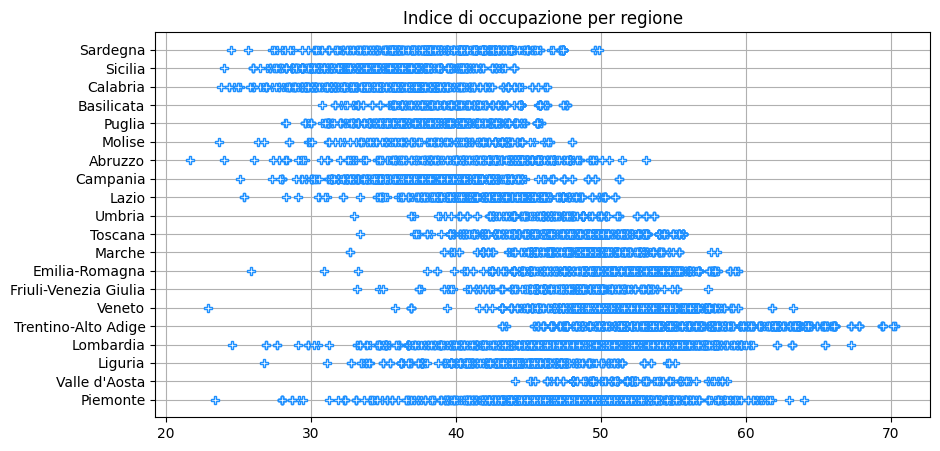

In [5]:
plt.figure(figsize=(10,5))
plt.plot(df['Indice di occupazione'],df['Regione'],'P', markeredgecolor = 'dodgerblue', color='w', alpha=1) # scatterplot
plt.grid()
plt.title('Indice di occupazione per regione')



## Correlazione tra alcune variabili economiche (quelle che erano numeriche di base)

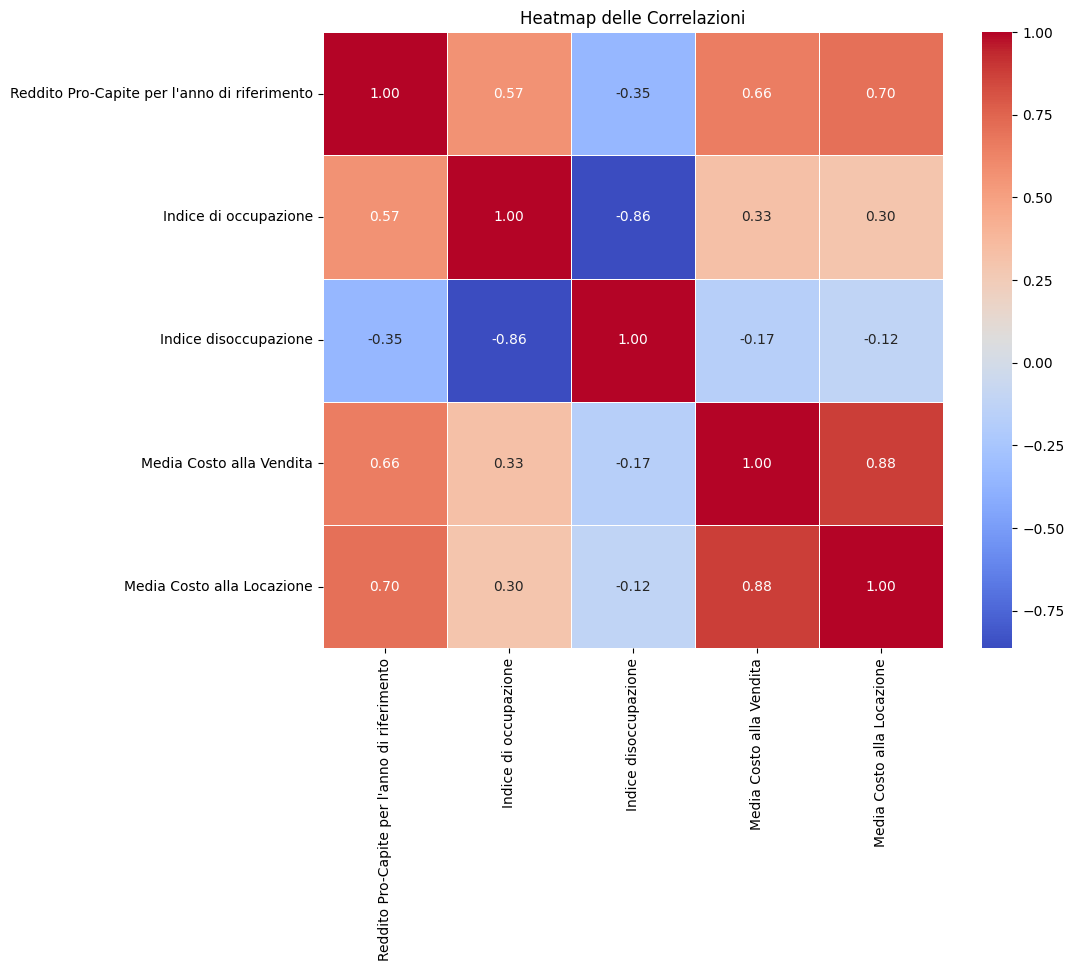

In [6]:
colonne_da_includere = ["Reddito Pro-Capite per l'anno di riferimento", "Indice di occupazione", "Indice disoccupazione", "Media Costo alla Vendita", "Media Costo alla Locazione"] 
corr_matrix = df[colonne_da_includere].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, linecolor="white")
plt.title("Heatmap delle Correlazioni")
plt.show()

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
df = pd.get_dummies(df, columns=['Descrizione Tipologia di Immobile'], drop_first=True)

# variabile dummy per i valori non numerici che volevamo analizzare

In [9]:
colonne_dummies = [col for col in df.columns if "Descrizione Tipologia di Immobile" in col]

# ripristinare una colonna eliminata con drop = 'first'  

In [10]:
df['Descrizione Tipologia di Immobile_Abitazioni civili'] = 1 - df[colonne_dummies].sum(axis=1)

In [11]:
df[colonne_dummies] = df[colonne_dummies].astype(int)


In [12]:
print(df.head())

   id_istat     id_comune    cap Provincia   Regione Ripartizione Geografica  \
0      1001         Agliè  10011    Torino  Piemonte              Nord-ovest   
1      1001         Agliè  10011    Torino  Piemonte              Nord-ovest   
2      1002       Airasca  10060    Torino  Piemonte              Nord-ovest   
3      1002       Airasca  10060    Torino  Piemonte              Nord-ovest   
4      1003  Ala di Stura  10070    Torino  Piemonte              Nord-ovest   

  id_catastale  Latitudine  Longitudine  Superficie in km2  ...  \
0         A074   45.363467     7.768606            13.2851  ...   
1         A074   45.363467     7.768606            13.2851  ...   
2         A109   44.917006     7.484504            15.7819  ...   
3         A109   44.917006     7.484504            15.7819  ...   
4         A117   45.314924     7.304367            45.7648  ...   

   Costo Massimo alla Locazione  Media Costo alla Locazione  \
0                           4.0                      

# matrice di correlazione per le tipologie di immobili e la media costo vendita e locazione

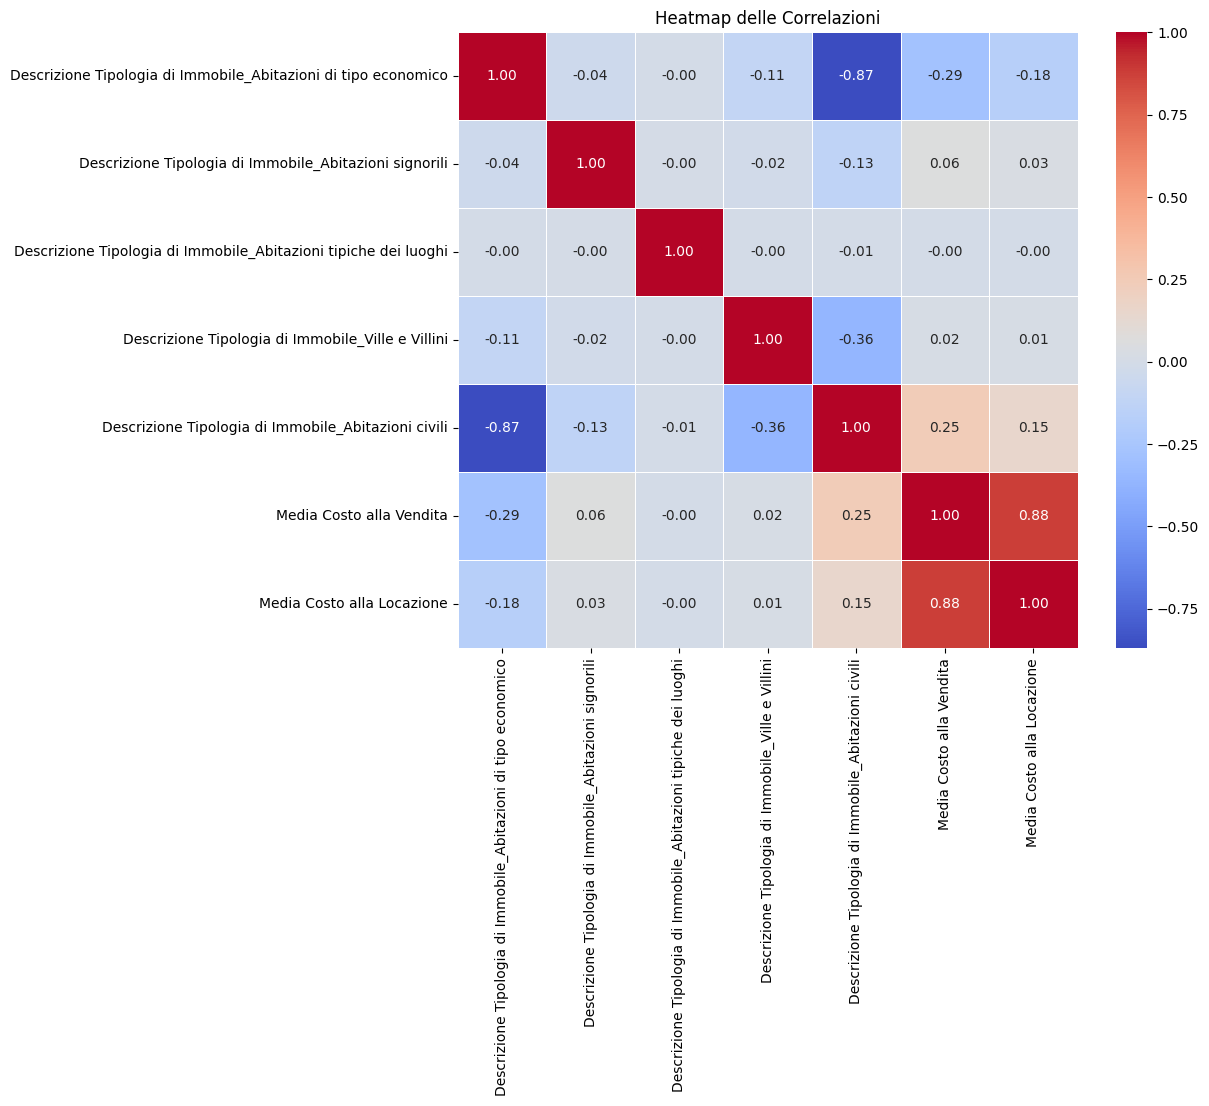

In [13]:
colonne_da_includere_2 = ["Descrizione Tipologia di Immobile_Abitazioni di tipo economico", "Descrizione Tipologia di Immobile_Abitazioni signorili", "Descrizione Tipologia di Immobile_Abitazioni tipiche dei luoghi", "Descrizione Tipologia di Immobile_Ville e Villini", "Descrizione Tipologia di Immobile_Abitazioni civili", "Media Costo alla Vendita", "Media Costo alla Locazione"] 
corr_matrix = df[colonne_da_includere_2].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, linecolor="white")
plt.title("Heatmap delle Correlazioni")
plt.show()

# Divisioni delle Regioni per Macroarea

In [14]:
regioni_nord = ['Piemonte', "Valle d'Aosta", 'Lombardia', 'Trentino-Alto Adige', 'Veneto', 'Friuli-Venezia Giulia', 'Liguria', 'Emilia-Romagna']
regioni_centro = ['Toscana', 'Umbria', 'Marche', 'Lazio']
regioni_sud = ['Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata', 'Calabria']
regioni_isole = ['Sicilia', 'Sardegna']

def assegna_ripartizione(regione):
    if regione in regioni_nord:
        return 'Nord'
    elif regione in regioni_centro:
        return 'Centro'
    elif regione in regioni_sud:
        return 'Sud'
    elif regione in regioni_isole:
        return 'Isole'
    else:
        return 'Sconosciuto'

df['Macroarea'] = df['Regione'].apply(assegna_ripartizione)

df[['Regione', 'Macroarea']].head()


,Regione,Macroarea
0,Piemonte,Nord
1,Piemonte,Nord
2,Piemonte,Nord
3,Piemonte,Nord
4,Piemonte,Nord


In [15]:
df.columns

Index(['id_istat', 'id_comune', 'cap', 'Provincia', 'Regione',
       'Ripartizione Geografica', 'id_catastale', 'Latitudine', 'Longitudine',
       'Superficie in km2', 'Indice di spopolamento', 'Codice regione',
       'Capoluogo_enc', 'Reddito Pro-Capite per l'anno di riferimento',
       'Codice comuni', 'Esercizi a 5 stelle', 'Letti', 'Camere', 'Bagni',
       'Esercizi a 4 stelle', 'Letti.1', 'Camere.1', 'Bagni.1',
       'Esercizi a 3 stelle', 'Letti.2', 'Camere.2', 'Bagni.2',
       'Esercizi a 2 stelle', 'Letti.3', 'Camere.3', 'Bagni.3',
       'Esercizi a 1 stella', 'Letti.4', 'Camere.4', 'Bagni.4',
       'Esercizi turistico-alberghiere', 'Letti.5', 'Camere.5', 'Bagni.5',
       'Esercizi alberghieri', 'Letti.6', 'Camere.6', 'Bagni.6',
       'Numero campeggi e villaggi turistici', 'Letti.7',
       'Numero di alloggi in affitto gestiti in forma imprenditoriale',
       'Letti.8', 'Numero di agriturismi', 'Letti.9',
       'Numero di ostelli per la gioventù', 'Letti.10',
   

## Salviamo il df con le nuove colonne

In [31]:
# save the df with the new columns 
df.to_csv("data/df2.csv", index=False)


# Calcolo delle medie di alcune delle variabili economiche/sociali divise per Macroaree

In [16]:
df.groupby('Macroarea')[["Reddito Pro-Capite per l'anno di riferimento", 'Indice di occupazione', 'Indice disoccupazione']].mean()


,Reddito Pro-Capite per l'anno di riferimento,Indice di occupazione,Indice disoccupazione
Macroarea,,,
Centro,25.349882,47.315307,12.581153
Isole,18.438381,35.857146,25.056770
Nord,24.175388,49.572173,9.187589
Sud,17.594083,38.043390,19.475348


# Rappresentazioni grafiche

C:\Users\silvi\AppData\Local\Temp\ipykernel_10728\1636255058.py:2: FutureWarning: 
C:\Users\Acer\AppData\Local\Temp\ipykernel_39824\1636255058.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Macroarea', y="Reddito Pro-Capite per l'anno di riferimento", data=df, palette='coolwarm')


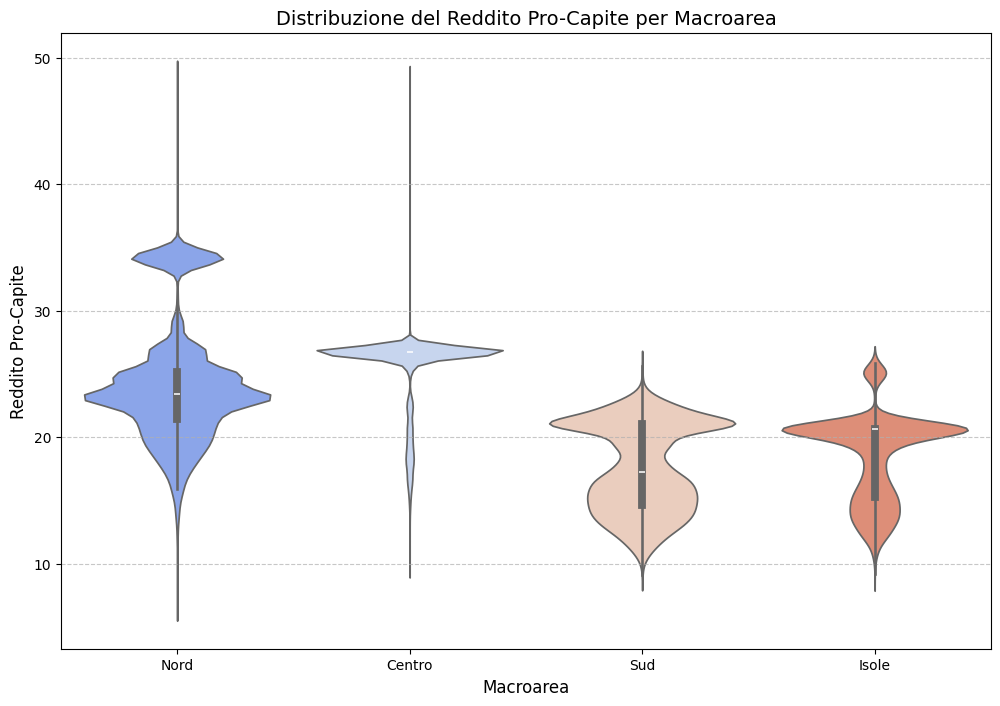

In [17]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Macroarea', y="Reddito Pro-Capite per l'anno di riferimento", data=df, palette='coolwarm')

plt.title('Distribuzione del Reddito Pro-Capite per Macroarea', fontsize=14)
plt.xlabel('Macroarea', fontsize=12)
plt.ylabel('Reddito Pro-Capite', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


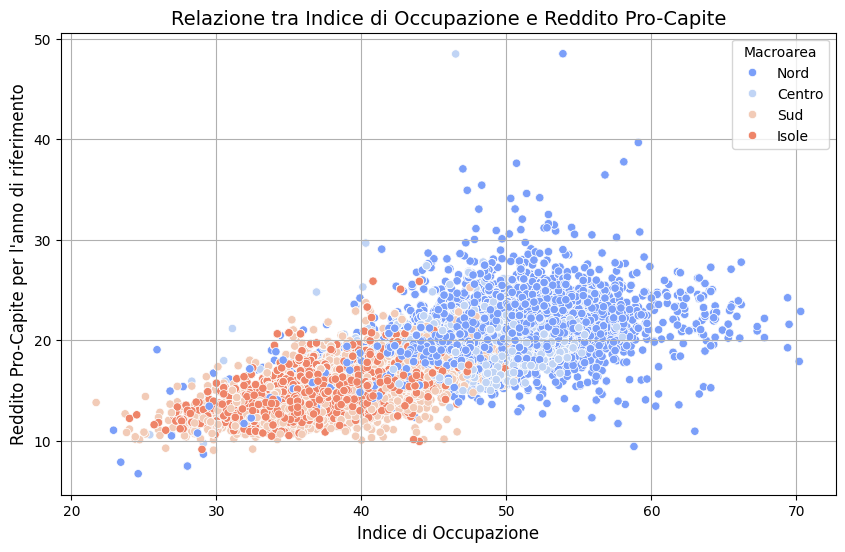

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Indice di occupazione", y="Reddito Pro-Capite per l'anno di riferimento", hue="Macroarea", data=df, palette="coolwarm")

plt.title("Relazione tra Indice di Occupazione e Reddito Pro-Capite", fontsize=14)
plt.xlabel("Indice di Occupazione", fontsize=12)
plt.ylabel("Reddito Pro-Capite per l'anno di riferimento", fontsize=12)
plt.legend(title="Macroarea")
plt.grid(True)
plt.show()


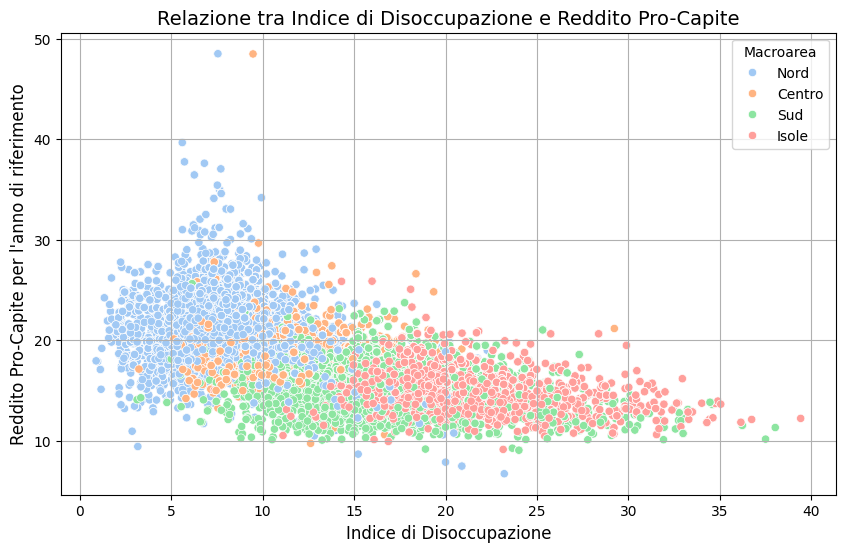

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Indice disoccupazione", y="Reddito Pro-Capite per l'anno di riferimento", hue="Macroarea", data=df, palette="pastel")

plt.title("Relazione tra Indice di Disoccupazione e Reddito Pro-Capite", fontsize=14)
plt.xlabel("Indice di Disoccupazione", fontsize=12)
plt.ylabel("Reddito Pro-Capite per l'anno di riferimento", fontsize=12)
plt.legend(title="Macroarea")
plt.grid(True)
plt.show()


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55033 entries, 0 to 55032
Data columns (total 98 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   id_istat                                                                                                        55033 non-null  int64  
 1   id_comune                                                                                                       55032 non-null  object 
 2   cap                                                                                                             55033 non-null  int64  
 3   Provincia                                                                                                       55033 non-null  object 
 4   Regione                                 

In [21]:
color_blue = "deepskyblue"
color_green = "mediumseagreen"
color_pink = "hotpink"
color_yellow = "gold"
color_purple = "mediumorchid"
color_orange = "darkorange"
color_mint = "mediumaquamarine"
color_lavender = "blueviolet"
color_sky = "cadetblue"
color_rose = "lightcoral"
color_red = "indianred"
color_black = "black"
color_white = "white"


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55033 entries, 0 to 55032
Data columns (total 98 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   id_istat                                                                                                        55033 non-null  int64  
 1   id_comune                                                                                                       55032 non-null  object 
 2   cap                                                                                                             55033 non-null  int64  
 3   Provincia                                                                                                       55033 non-null  object 
 4   Regione                                 

In [32]:
df.columns

Index(['id_istat', 'id_comune', 'cap', 'Provincia', 'Regione',
       'Ripartizione Geografica', 'id_catastale', 'Latitudine', 'Longitudine',
       'Superficie in km2',
       ...
       'Macroarea',
       'Tipo di località_Altri comuni non altrimenti classificati',
       'Tipo di località_Capoluogo senza specifici interessi turistici',
       'Tipo di località_Città d'Arte', 'Tipo di località_Località collinari',
       'Tipo di località_Località lacuali', 'Tipo di località_Località marine',
       'Tipo di località_Località montane',
       'Tipo di località_Località religiose',
       'Tipo di località_Località termali'],
      dtype='object', length=106)